In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

HEIGHT = 4
WIDTH = 4

class grid_world:
    def __init__(self):
        self.width = WIDTH
        self.height = HEIGHT


    def is_terminal(self, state):   # Goal state
        x, y = state
        return (x == 0 and y == 0) or (x == self.width - 1 and y == self.height - 1)


    def interaction(self, state, action):
        if self.is_terminal(state):
            return state, 0

        next_state = (np.array(state) + action).tolist()
        x, y = next_state

        if x < 0 or x >= self.width or y < 0 or y >= self.height:
            next_state = state

        reward = -1
        return next_state, reward


    def size(self):
        return self.width, self.height


In [2]:
def draw_image(iteration, image):
    fig, ax = plt.subplots()
    plt.suptitle('Iteration:{:d}'.format(iteration))
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(image):
        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor='white')

    # Row and column labels...
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')
    ax.add_table(tb)

    plt.show()


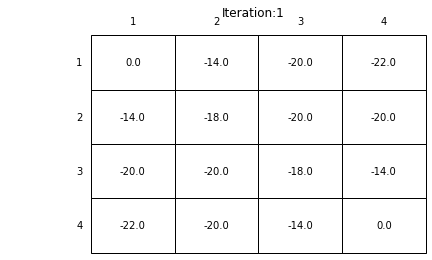

In [5]:
WORLD_SIZE = 4
# left, up, right, down
ACTIONS = {'LEFT':np.array([0, -1]), 'UP':np.array([-1, 0]), 'RIGHT':np.array([0, 1]), 'DOWN':np.array([1, 0])}
ACTION_PROB = 0.25


def evaluate_state_value_by_matrix_inversion(env, discount=1.0):
    WIDTH, HEIGHT = env.size()

    # Reward matrix R
    R = np.zeros((WIDTH, HEIGHT))
    for i in range(WIDTH):
        for j in range(HEIGHT):
            expected_reward = 0
            for action in ACTIONS:
                (next_i, next_j), reward = env.interaction([i, j], ACTIONS[action])
                expected_reward += ACTION_PROB*reward
            R[i, j] = expected_reward
    R = R.reshape((-1,1))
    R = R[1:-1,:]

    ##############################
    # Transition matrix T

    num_states = 14

    I = np.eye(num_states)
    T = np.zeros((num_states + 2, num_states + 2))    

    # generate T matrix    
    for i in range(WIDTH):
      for j in range(HEIGHT):
        if env.is_terminal((i,j)):
          pass
        else:
          for action in ACTIONS:
            (next_i, next_j), reward = env.interaction([i, j], ACTIONS[action])
            T[4*i + j, 4*next_i + next_j] += ACTION_PROB
    
    # delete Terminal state rows and columns
    T = T[1:15, 1:15]

    # calculate V
    I_minus_T = I - T
    inv = np.linalg.inv(I_minus_T)
    V = np.dot(inv, R)
    V = np.insert(V, 0, [0.], 0)
    V = np.insert(V, len(V), [0.], 0)

    ##############################

    new_state_values = V.reshape(WIDTH,HEIGHT)
    draw_image(1, np.round(new_state_values, decimals=2))

    return new_state_values

env = grid_world()
values = evaluate_state_value_by_matrix_inversion(env = env)



